In [1]:
import numpy as np

In [2]:
series = np.sin(0.1* np.arange(200))*np.cos(0.2* np.arange(200))

In [3]:
import matplotlib.pyplot as plt

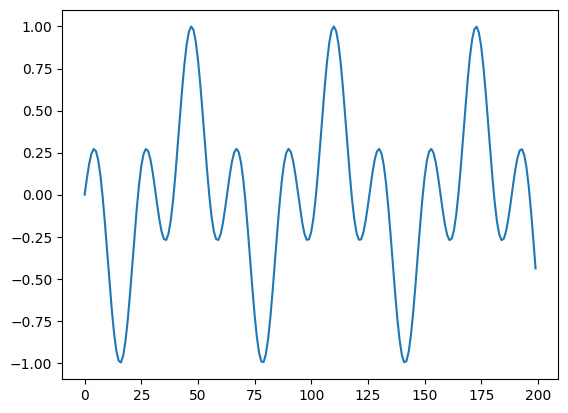

In [4]:
plt.plot(series)

In [5]:
T = 10

In [6]:
X =[]

In [7]:
Y=[]

In [8]:
for t in range (len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y= series[t+T]
  Y.append(y)

In [9]:
X = np.array(X).reshape(-1,T)
Y = np.array(Y)

In [10]:
n = len(X)

In [11]:
from tensorflow.keras.layers import Input, Dense

In [12]:
from tensorflow.keras.models import Model

In [13]:
i  = Input(shape = (T,))
x = Dense(1)(i)
model = Model(i,x)

In [14]:
model.compile(optimizer='adam', loss = 'mse')

In [15]:
r = model.fit(X[: -n//2], Y[:-n//2], validation_data= (X[-n//2:], Y[-n//2:]), epochs=80)

Epoch 1/80
3/3 [==============================] - 1s 110ms/step - loss: 0.1623 - val_loss: 0.1580
Epoch 2/80
3/3 [==============================] - 0s 19ms/step - loss: 0.1539 - val_loss: 0.1504
Epoch 3/80
3/3 [==============================] - 0s 17ms/step - loss: 0.1457 - val_loss: 0.1430
Epoch 4/80
3/3 [==============================] - 0s 28ms/step - loss: 0.1376 - val_loss: 0.1358
Epoch 5/80
3/3 [==============================] - 0s 18ms/step - loss: 0.1292 - val_loss: 0.1289
Epoch 6/80
3/3 [==============================] - 0s 19ms/step - loss: 0.1224 - val_loss: 0.1223
Epoch 7/80
3/3 [==============================] - 0s 24ms/step - loss: 0.1151 - val_loss: 0.1160
Epoch 8/80
3/3 [==============================] - 0s 17ms/step - loss: 0.1082 - val_loss: 0.1101
Epoch 9/80
3/3 [==============================] - 0s 27ms/step - loss: 0.1017 - val_loss: 0.1046
Epoch 10/80
3/3 [==============================] - 0s 22ms/step - loss: 0.0958 - val_loss: 0.0993
Epoch 11/80
3/3 [===========

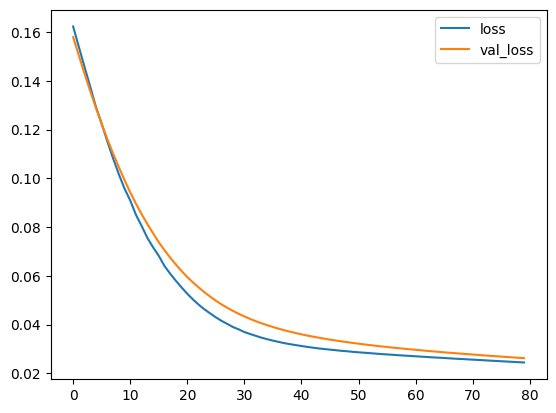

In [16]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label ='val_loss')
plt.legend()

In [17]:
validation_target = Y[-n//2:]

In [18]:
validation_prediction = []

In [19]:
lastX = X[-n//2]

In [20]:
while len(validation_prediction) < len(validation_target):
  p = model.predict(lastX.reshape(1,-1))[0,0]
  validation_prediction.append(p)
  lastX = np.roll(lastX, -1)
  lastX[-1]= p

1/1 [==============================] - 0s 20ms/step


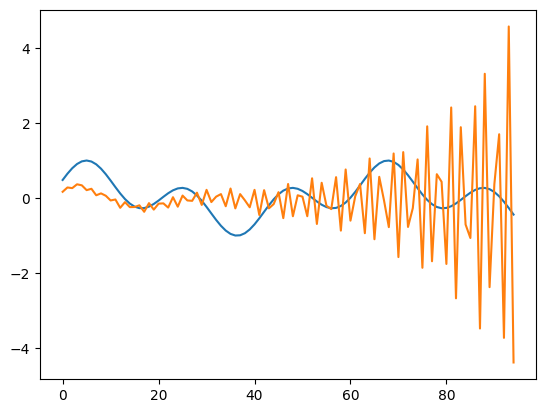

In [21]:
plt.plot(validation_target)
plt.plot(validation_prediction)